In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

In [ ]:
def fx(x):
  return 3*x**2 -3*x+4

def deriv(x):
  return 6*x-3

(-2.0, 2.0)

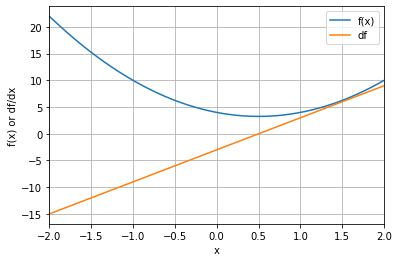

In [ ]:
x = np.linspace(-2,2,2222)

plt.plot(x,fx(x),x,deriv(x))
plt.xlabel('x')
plt.ylabel('f(x) or df/dx')
plt.legend(['f(x)','df'])
plt.grid('on')
plt.xlim(x[[0,-1]])

In [ ]:
# random startin point
localmin = np.random.choice(x,1)

# GD parameters
learning_rate = 0.01
training_epoch = 100

# initialize outputs matrix

modelparams = np.zeros((training_epoch,2))


#training
for i in range(training_epoch):
  grad = deriv(localmin)
  localmin -= learning_rate*grad
  modelparams[i,:] = localmin,grad

localmin

array([0.4961581])

Text(0.5, 1.0, 'Empirical local min 0.4961580965850522')

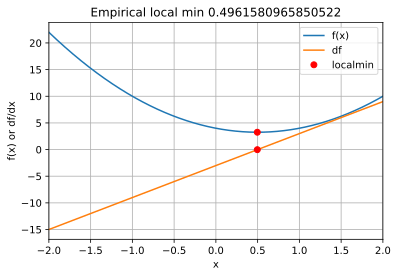

In [ ]:
from IPython import display
display.set_matplotlib_formats('svg')

plt.plot(x,fx(x),x,deriv(x))
plt.plot(localmin,fx(localmin),'ro')
plt.plot(localmin,deriv(localmin),'ro')
plt.xlabel('x')
plt.ylabel('f(x) or df/dx')
plt.legend(['f(x)','df','localmin'])
plt.grid('on')
plt.xlim(x[[0,-1]])
plt.title(f'Empirical local min {localmin[0]}')

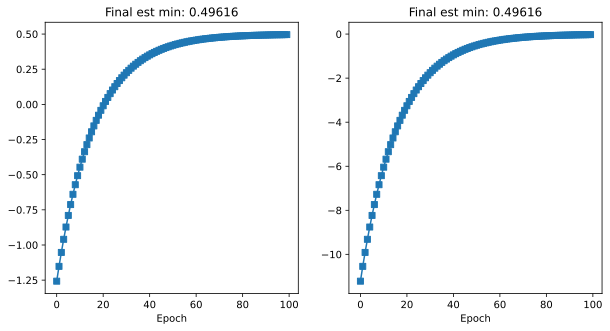

In [ ]:
fig,ax = plt.subplots(1,2,figsize = (10,5))

for i in range(2):
  ax[i].plot(modelparams[:,i],'s-')
  ax[i].set_xlabel('Epoch')
  ax[i].set_title(f'Final est min: {localmin[0]:.5f}')

In [ ]:
def peaks(x,y):
  # expand to a 2D mesh
  x,y = np.meshgrid(x,y)

  z = 3*(1-x)**2 * np.exp(-(x**2) - (y+1)**2) \
      - 10*(x/5 - x**3 - y**5) * np.exp(-x**2-y**2) \
      - 1/3*np.exp(-(x+1)**2 - y**2)
  return z


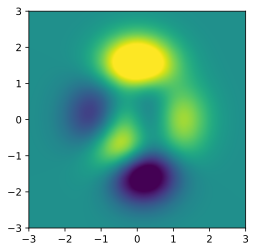

In [ ]:
# create and show function

x = np.linspace(-3,3,201)
y = np.linspace(-3,3,201)

Z = peaks(x,y)
plt.imshow(Z,extent=[x[0],x[-1],y[0],y[-1]],origin = 'top',vmin = -5,vmax = 5)

In [ ]:
sx,sy = sym.symbols('sx,sy')
sZ = 3*(1-sx)**2 * sym.exp(-(sx**2) - (sy+1)**2) \
      - 10*(sx/5 - sx**3 - sy**5) * sym.exp(-sx**2-sy**2) \
      - 1/3*sym.exp(-(sx+1)**2 - sy**2)

dfx = sym.lambdify((sx,sy),sym.diff(sZ,sx),'sympy')
dfy = sym.lambdify((sx,sy),sym.diff(sZ,sy),'sympy')

dfx(1,1).evalf()

-1.07369833656079

In [45]:
# random startin point
localmin = np.random.rand(2)*4-2

# GD parameters
learning_rate = 0.01
training_epoch = 1000

# initialize outputs matrix

modelparams = np.zeros((training_epoch,2))


#training
for i in range(training_epoch):
  dx = dfx(localmin[0],localmin[1])
  dy = dfy(localmin[0],localmin[1])
  grad = np.array([dx,dy])
  
  localmin = localmin - learning_rate*grad
  modelparams[i,:] = localmin

localmin

array([-1.34739624436821, 0.204518866097005], dtype=object)

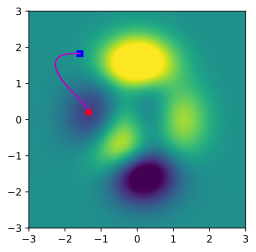

In [47]:
plt.imshow(Z,extent=[x[0],x[-1],y[0],y[-1]],origin = 'top',vmin = -5,vmax = 5)
plt.plot(modelparams[0,0],modelparams[0,1],'bs')
plt.plot(modelparams[-1,0],modelparams[-1,1],'ro')
plt.plot(modelparams[:,0],modelparams[:,1],'m')

(-3.3, 3.3, -3.3, 3.3)

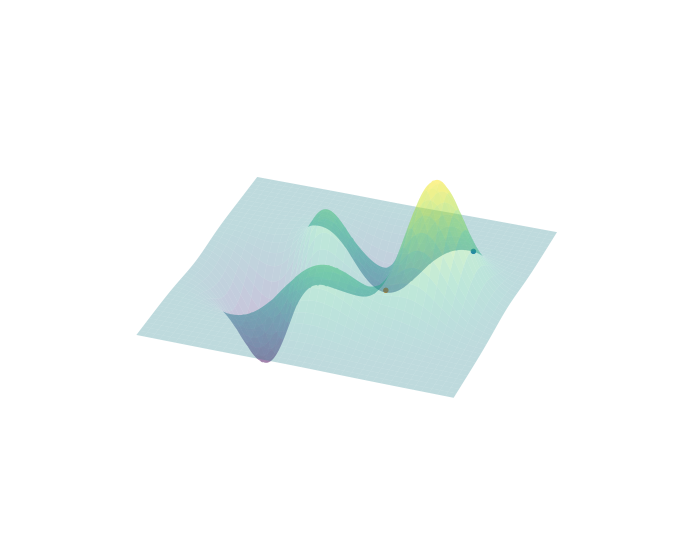

In [55]:
X,Y = np.meshgrid(x,y)
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection = '3d')
ax.plot_surface(X,Y,Z,cmap = 'viridis',alpha = .3)
ax.scatter(modelparams[0,0],modelparams[0,1],
           peaks(modelparams[0,0],modelparams[0,1]),'bs')
ax.scatter(modelparams[-1,0],modelparams[-1,1],
           peaks(modelparams[-1,0],modelparams[-1,1]),'ro')
ax.view_init(40,20)
ax.axis('off')